<a href="https://colab.research.google.com/github/MINJIN82/-Ubion/blob/main/2023_01_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [4]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/감귤3.csv", encoding='cp949') #encoding = "utf-8"
df

,날짜,품목,등급,거래단위,최저가,최고가,평균가,전일대비\n등락,전일\n평균대비
0,2023.01.03,감귤,특,5kg상자,13000,34000,18415,18415,0
1,2023.01.04,감귤,특,5kg상자,13000,31000,18049,-366,"18,415\n(98.0%)"
2,2023.01.03,감귤,상,5kg상자,10500,13000,11590,11590,0
3,2023.01.04,감귤,상,5kg상자,9000,13000,10404,-1186,"11,590\n(89.0%)"
4,2023.01.03,감귤,보통,5kg상자,7000,10500,8888,8888,0
5,2023.01.04,감귤,보통,5kg상자,5500,9000,7325,-1563,"8,888\n(82.0%)"
6,2023.01.03,감귤,하,5kg상자,2500,7000,5646,5646,0
7,2023.01.04,감귤,하,5kg상자,1500,5500,4258,-1388,"5,646\n(75.0%)"
8,2023.01.03,감귤,특,10kg상자,21000,21000,21000,21000,0
9,2023.01.04,감귤,특,10kg상자,12500,12500,12500,-8500,"21,000\n(59.0%)"


In [7]:
import seaborn as sns 
import numpy as np

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


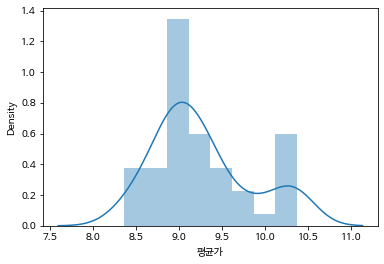

In [8]:
# 평균가 정규분포 확인
df["평균가"]= np.log1p(df["평균가"])
sns.distplot(df["평균가"])
 

In [25]:
#박스값 구하기

q1 = df["평균가"].quantile(q=0.25)
q3 = df["평균가"].quantile(q=0.75)
IQR = q3-q1
IQR

0.055665099550333164

In [26]:
# 수염값 구하기
data_IQR = df[(df["평균가"] < q3 + IQR * 1.5) & (df["평균가"] > q1 - IQR * 1.5)]
data_IQR

,날짜,품목,등급,거래단위,최저가,최고가,평균가,전일대비\n등락,전일\n평균대비
0,2023.01.03,감귤,특,5kg상자,13000,34000,2.284520,18415,0
1,2023.01.04,감귤,특,5kg상자,13000,31000,2.282474,-366,"18,415\n(98.0%)"
2,2023.01.03,감귤,상,5kg상자,10500,13000,2.236230,11590,0
3,2023.01.04,감귤,상,5kg상자,9000,13000,2.224628,-1186,"11,590\n(89.0%)"
4,2023.01.03,감귤,보통,5kg상자,7000,10500,2.207458,8888,0
5,2023.01.04,감귤,보통,5kg상자,5500,9000,2.185960,-1563,"8,888\n(82.0%)"
6,2023.01.03,감귤,하,5kg상자,2500,7000,2.156273,5646,0
7,2023.01.04,감귤,하,5kg상자,1500,5500,2.123074,-1388,"5,646\n(75.0%)"
8,2023.01.03,감귤,특,10kg상자,21000,21000,2.297806,21000,0
9,2023.01.04,감귤,특,10kg상자,12500,12500,2.244274,-8500,"21,000\n(59.0%)"


In [27]:
#이상치 확인
data_outlier = df[(df["평균가"] < q1- IQR * 1.5)]
data_outlier

,날짜,품목,등급,거래단위,최저가,최고가,평균가,전일대비\n등락,전일\n평균대비


In [12]:
#이상치 확인
data_outlier = df[(df["평균가"] > q3+ IQR * 1.5)]
data_outlier

,날짜,품목,등급,거래단위,최저가,최고가,평균가,전일대비\n등락,전일\n평균대비
45,2023.01.03,감귤 하우스,특,10kg상자,32000,32000,10.373522,32000,0
46,2023.01.04,감귤 하우스,특,10kg상자,32000,32000,10.373522,0,"32,000\n(100.0%)"
47,2023.01.03,감귤 하우스,상,10kg상자,30000,32000,10.341775,31000,0
48,2023.01.04,감귤 하우스,상,10kg상자,30000,32000,10.341775,0,"31,000\n(100.0%)"
49,2023.01.03,감귤 하우스,보통,10kg상자,30000,30000,10.308986,30000,0
50,2023.01.04,감귤 하우스,보통,10kg상자,30000,30000,10.308986,0,"30,000\n(100.0%)"
51,2023.01.03,감귤 하우스,하,10kg상자,28000,30000,10.250158,28286,0
52,2023.01.04,감귤 하우스,하,10kg상자,28000,30000,10.250158,0,"28,286\n(100.0%)"


<ipython-input-13-48c0c0677176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_IQR["평균가"]= np.log1p(data_IQR["평균가"])
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axe

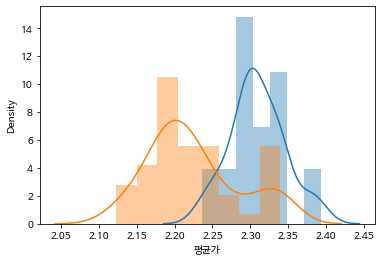

In [13]:
# 로그 적용하여 이전값과 비교
data_IQR["평균가"]= np.log1p(data_IQR["평균가"])
sns.distplot(data_IQR["평균가"])

df["평균가"]= np.log(df["평균가"])
sns.distplot(df["평균가"]) #수치 단위를 간단하게만 적용 

In [14]:
# 범주형 데이터 값 재배치
df_indp1 = df.replace("하", 0).replace("보통",1).replace("상",2).replace("특",3)
df_indp2 =df_indp1.replace("3kg상자", 0).replace("5kg상자",1).replace("10kg상자",2)

In [15]:
df_indp2

,날짜,품목,등급,거래단위,최저가,최고가,평균가,전일대비\n등락,전일\n평균대비
0,2023.01.03,감귤,3,1,13000,34000,2.284520,18415,0
1,2023.01.04,감귤,3,1,13000,31000,2.282474,-366,"18,415\n(98.0%)"
2,2023.01.03,감귤,2,1,10500,13000,2.236230,11590,0
3,2023.01.04,감귤,2,1,9000,13000,2.224628,-1186,"11,590\n(89.0%)"
4,2023.01.03,감귤,1,1,7000,10500,2.207458,8888,0
5,2023.01.04,감귤,1,1,5500,9000,2.185960,-1563,"8,888\n(82.0%)"
6,2023.01.03,감귤,0,1,2500,7000,2.156273,5646,0
7,2023.01.04,감귤,0,1,1500,5500,2.123074,-1388,"5,646\n(75.0%)"
8,2023.01.03,감귤,3,2,21000,21000,2.297806,21000,0
9,2023.01.04,감귤,3,2,12500,12500,2.244274,-8500,"21,000\n(59.0%)"


In [16]:
df2 = df_indp2[[df_indp2.columns[2], df_indp2.columns[3], df_indp2.columns[6]]]

In [17]:
df2

,등급,거래단위,평균가
0,3,1,2.284520
1,3,1,2.282474
2,2,1,2.236230
3,2,1,2.224628
4,1,1,2.207458
5,1,1,2.185960
6,0,1,2.156273
7,0,1,2.123074
8,3,2,2.297806
9,3,2,2.244274


In [18]:
#데이터 표준화 원핫인코딩
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

cg = ['등급','거래단위'] 

X =df[cg]
Y = df["평균가"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[0. 0. 1. 0. 1. 0. 0.]


In [19]:
#LinearRegression 선형모델 분석

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt 

lr = LinearRegression().fit(X_train, Y_train) 

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse)) 

predict value
 [2.15369    2.22676633 2.23321236 2.20407761 2.28126863 2.21286242
 2.22676633 2.1901737  2.24711627 2.2585799  2.1901737  2.28126863
 2.22209621 2.22209621 2.24711627 2.23321236]
train R2 : 0.595
test R2 : 0.046
RMSE : 0.041


In [20]:
import pandas as pd
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()
Y_test_df = pd.DataFrame(Y_test_df["평균가"])
Y_test_df

,평균가
0,2.141427
1,2.198111
2,2.195815
3,2.188609
4,2.218696
5,2.236230
6,2.198111
7,2.166752
8,2.202537
9,2.233594


In [21]:
#범주 재배치

Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()

In [22]:
Y_test_df = Y_test_df["평균가"]

In [23]:
Y_test_df

0     2.141427
1     2.198111
2     2.195815
3     2.188609
4     2.218696
5     2.236230
6     2.198111
7     2.166752
8     2.202537
9     2.233594
10    2.207458
11    2.278719
12    2.195815
13    2.327293
14    2.202537
15    2.195815
Name: 평균가, dtype: float64

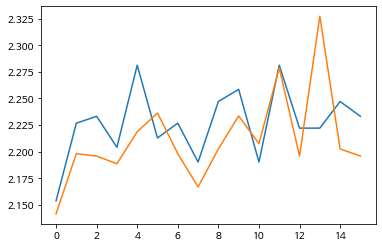

In [24]:
#Y값 Y^값 비교(파란색 Y^,오렌지색 Y)
from pandas.errors import InvalidIndexError
import matplotlib.pyplot as plt

%matplotlib Inline
plt.plot(Y_pred)
plt.plot(Y_test_df)